This is the tutorial to classify breast cancer to be either benign of malignant using neural network.

The dataset is loaded using keras.datasets.

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

## Let's load the dataset

In [2]:
dataset = sklearn.datasets.load_breast_cancer()

## The dataset will be in the form of dictionary.

## We will need to frame the data using pandas dataframe.

In [3]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

##'data' key contains input data and names of the data are included in 'feature_names'.

## 'target' field contains the output of each data.

### 'malignant' - 0
### 'benign' - 1

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## DataFrame doesn't contain output label. Let's add it to the dataframe.

In [6]:
df['output'] = dataset.target

## Let's display starting 10 rows of the dataframe.

In [7]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,output
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


## Let's see how many rows and columns do we have

In [8]:
df.shape

(569, 31)

## Let's see the information of dataframe that includes:

-  ### data type of each column
-  ### count of empty values in each column.



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## To specifically check the null values

In [10]:
df.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,output
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
output                     0
dtype: int64

## We can get statistical analysis of the data

In [12]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,output
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Since we are working on binary classification, we need to ensure that the output column has only two unique values, 0 or 1.

In [13]:
df['output'].unique()

array([0, 1])

## We can get number of '0's and '1's

In [14]:
df['output'].value_counts()

output
1    357
0    212
Name: count, dtype: int64

## Let's get the mean value of each column for '0' and '1' categories.

In [15]:
df.groupby('output').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
output,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### Here we can analyse that the patient is malignant having greater input values.

---
## The dataset is already filtered so we don't need to apply filteration.

## To train the model, we need 'X' and 'Y' as input and output.

In [16]:
X = df.drop(columns='output', axis=1)
Y = df['output']

In [17]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: output, Length: 569, dtype: int64

## Now we need to split the data into training and testing.

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Here test_size=0.2 means that data will be divided into 80% training and 20% testing.

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


## To increase the accuracy of the model, we need to standardise the data that brings all the column values under a same range.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scalar = StandardScaler()
X_train_std = scalar.fit_transform(X_train)
X_test_std = scalar.transform(X_test)

In [23]:
print(X_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


In [24]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


### Here, all of the pre-processing work has completed.
### Now we will create neural network using tensorflow and keras

In [25]:
import tensorflow as tf
tf.random.set_seed(5)
from tensorflow import keras

random seed is specified not to get random results everytime.
This happens because the 'weight' and 'bias' gets changed.

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

### 'keras.layers.Flatten' is for input layer.

### The input layer is Flattened first before putting it into neural network because neural network expects the input to be in single dimension.

### Now, compiling the model

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Here we are using 'adam' optimizer to optimize gradient descent.
### 'sparse_categorical_crossentropy' because our output is in the form of integes ( not in one-hot form).

---

### Now training the model and assigning it to variable 'history'

In [28]:
history = model.fit(X_train_std, Y_train, epochs=20)

Epoch 1/20
15/15 [==============================] - 3s 8ms/step - loss: 0.5904 - accuracy: 0.7187
Epoch 2/20
15/15 [==============================] - 0s 7ms/step - loss: 0.3856 - accuracy: 0.8791
Epoch 3/20
15/15 [==============================] - 0s 7ms/step - loss: 0.2809 - accuracy: 0.9253
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.2284 - accuracy: 0.9341
Epoch 5/20
15/15 [==============================] - 0s 10ms/step - loss: 0.1941 - accuracy: 0.9451
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1701 - accuracy: 0.9516
Epoch 7/20
15/15 [==============================] - 0s 14ms/step - loss: 0.1528 - accuracy: 0.9582
Epoch 8/20
15/15 [==============================] - 0s 9ms/step - loss: 0.1380 - accuracy: 0.9604
Epoch 9/20
15/15 [==============================] - 0s 10ms/step - loss: 0.1269 - accuracy: 0.9670
Epoch 10/20
15/15 [==============================] - 0s 10ms/step - loss: 0.1173 - accuracy: 0.9670
Epoch 11/20
15/

### History contains 'loss' and 'accuracy' values of each epochs.

In [29]:
history.history

{'loss': [0.5904037952423096,
  0.38555070757865906,
  0.28090545535087585,
  0.22836381196975708,
  0.19413559138774872,
  0.17010746896266937,
  0.15282507240772247,
  0.13801796734333038,
  0.1268903762102127,
  0.11731358617544174,
  0.10992998629808426,
  0.10306944698095322,
  0.09739785641431808,
  0.09225592017173767,
  0.08739390224218369,
  0.08358963578939438,
  0.0800715833902359,
  0.07717946171760559,
  0.0741564929485321,
  0.07172219455242157],
 'accuracy': [0.7186813354492188,
  0.8791208863258362,
  0.9252747297286987,
  0.9340659379959106,
  0.9450549483299255,
  0.9516483545303345,
  0.9582417607307434,
  0.9604395627975464,
  0.9670329689979553,
  0.9670329689979553,
  0.9670329689979553,
  0.9714285731315613,
  0.9758241772651672,
  0.9802197813987732,
  0.9824175834655762,
  0.9824175834655762,
  0.9824175834655762,
  0.9824175834655762,
  0.9846153855323792,
  0.9846153855323792]}

### Let's plot 'accuracy' and 'loss'

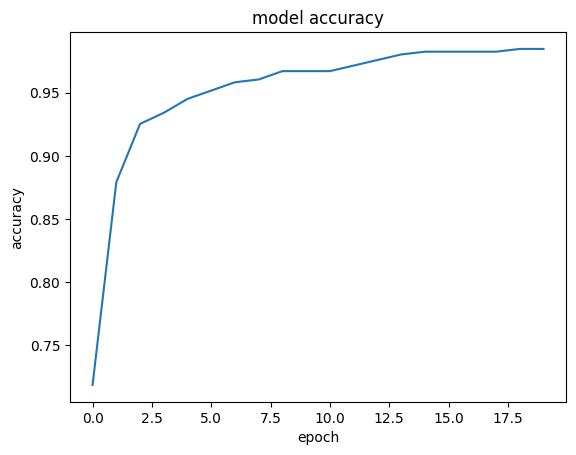

In [30]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

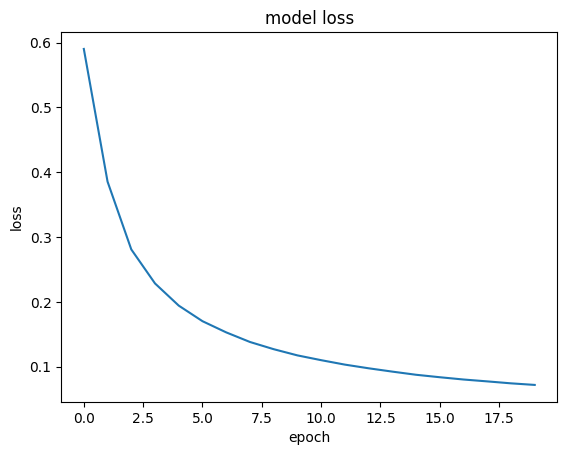

In [31]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Let's get the final 'accuracy' and 'loss' of the model

In [32]:
loss, accuracy = model.evaluate(X_test_std, Y_test)

4/4 [==============================] - 0s 10ms/step - loss: 0.1073 - accuracy: 0.9649


### The accuracy of out model is '94.7%' that is quite good.

### Let's now get the predicted value by using 'X_test_std'

In [33]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 4ms/step


In [34]:
print(Y_pred)

[[3.57372314e-01 8.58192861e-01]
 [5.09491742e-01 5.52000225e-01]
 [3.39279883e-02 9.81865346e-01]
 [9.96326506e-01 1.51218055e-05]
 [4.90695506e-01 6.26915514e-01]
 [9.85709667e-01 1.00582931e-03]
 [2.94548631e-01 7.35366583e-01]
 [1.19867884e-01 9.90033388e-01]
 [1.49413839e-01 9.69690561e-01]
 [1.63689360e-01 9.70683992e-01]
 [5.35411060e-01 3.57160568e-01]
 [1.47042364e-01 8.61439228e-01]
 [2.61072159e-01 8.47580552e-01]
 [3.56205344e-01 8.40783656e-01]
 [1.41980588e-01 9.76061523e-01]
 [8.41469228e-01 6.07228242e-02]
 [1.00232281e-01 9.82134819e-01]
 [6.29034564e-02 9.76640940e-01]
 [6.62147105e-02 9.90995407e-01]
 [9.55138862e-01 6.15339773e-03]
 [2.40396991e-01 9.96624470e-01]
 [6.33416176e-02 9.83794093e-01]
 [1.45442188e-01 9.80462492e-01]
 [7.18078911e-02 9.89385247e-01]
 [2.37293214e-01 8.98334026e-01]
 [9.07928288e-01 7.22476980e-03]
 [2.09357500e-01 9.05265927e-01]
 [3.42227519e-01 7.90868461e-01]
 [9.51682150e-01 2.86884308e-02]
 [9.32615161e-01 7.58102164e-03]
 [2.551724

### Modifying the values in 2 decimal format.

In [35]:
Y_pred_round = np.round(Y_pred, 2)

In [36]:
print(Y_pred_round)

[[0.36 0.86]
 [0.51 0.55]
 [0.03 0.98]
 [1.   0.  ]
 [0.49 0.63]
 [0.99 0.  ]
 [0.29 0.74]
 [0.12 0.99]
 [0.15 0.97]
 [0.16 0.97]
 [0.54 0.36]
 [0.15 0.86]
 [0.26 0.85]
 [0.36 0.84]
 [0.14 0.98]
 [0.84 0.06]
 [0.1  0.98]
 [0.06 0.98]
 [0.07 0.99]
 [0.96 0.01]
 [0.24 1.  ]
 [0.06 0.98]
 [0.15 0.98]
 [0.07 0.99]
 [0.24 0.9 ]
 [0.91 0.01]
 [0.21 0.91]
 [0.34 0.79]
 [0.95 0.03]
 [0.93 0.01]
 [0.26 0.93]
 [0.25 0.96]
 [0.09 0.98]
 [1.   0.  ]
 [0.9  0.  ]
 [0.12 0.94]
 [0.13 0.99]
 [0.31 0.87]
 [0.07 0.99]
 [0.16 0.95]
 [0.99 0.  ]
 [0.72 0.14]
 [0.11 0.97]
 [0.05 0.98]
 [0.67 0.07]
 [0.1  0.98]
 [0.03 1.  ]
 [0.11 0.96]
 [0.99 0.  ]
 [0.84 0.02]
 [0.15 0.97]
 [0.78 0.1 ]
 [0.49 0.37]
 [0.12 0.98]
 [0.06 0.99]
 [0.6  0.5 ]
 [0.28 0.96]
 [0.08 0.99]
 [0.85 0.05]
 [0.08 0.97]
 [0.35 0.77]
 [0.68 0.02]
 [0.1  0.99]
 [0.83 0.01]
 [0.92 0.04]
 [0.18 0.77]
 [0.97 0.  ]
 [0.9  0.06]
 [0.44 0.72]
 [0.4  0.85]
 [0.69 0.08]
 [0.97 0.02]
 [0.22 0.96]
 [0.73 0.08]
 [0.06 0.99]
 [0.68 0.04]
 [0.08 0.97]

### The output we can see is in the form of probability vector.
### Converting it into label '0' or '1'.

In [37]:
Y_pred_labels = [np.argmax(i) for i in Y_pred_round]

In [38]:
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


### Let's test our model by using an input

#### Notice: You first need to standardise the input using .transform() method because the model is trained on standardised input values.

In [39]:
# answer of input_data_1 is malignant
# answer of input_data_2 is benign

input_data_1 = (17.99,	10.38,	122.8,	1001,	0.1184,	0.2776,	0.3001,	0.1471,	0.2419,	0.07871,	1.095,	0.9053,	8.589,	153.4,	0.006399,	0.04904,	0.05373,	0.01587,	0.03003,	0.006193,	25.38,	17.33,	184.6,	2019,	0.1622,	0.6656,	0.7119,	0.2654,	0.4601,	0.1189)
input_data_2 = (13.54,	14.36,	87.46,	566.3,	0.09779,	0.08129,	0.06664,	0.04781,	0.1885,	0.05766,	0.2699,	0.7886,	2.058,	23.56,	0.008462,	0.0146,	0.02387,	0.01315,	0.0198,	0.0023,	15.11,	19.26,	99.7,	711.2,	0.144,	0.1773,	0.23,	0.1288,	0.2977,	0.07259)

# converting above tuples into np array.

input_data_np_1 = np.asarray(input_data_1)
input_data_np_2 = np.asarray(input_data_2)

# reshape the np array as we are predicting for one instance

input_data_reshaped_1 = input_data_np_1.reshape(1,-1)
input_data_reshaped_2 = input_data_np_2.reshape(1,-1)

# standardising the data
input_data_std_1 = scalar.transform(input_data_reshaped_1)
input_data_std_2 = scalar.transform(input_data_reshaped_2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Time to make predictions

In [40]:
prediction_1 = model.predict(input_data_std_1)
prediction_2 = model.predict(input_data_std_2)

prediction_label_1 = np.argmax(prediction_1)
prediction_label_2 = np.argmax(prediction_2)

1/1 [==============================] - 0s 34ms/step


In [41]:
if(prediction_label_1 == 0):
  print('The breast cancer is Malignant')
else:
  print('The breast cancer is Benign')

The breast cancer is Malignant


In [42]:
if(prediction_label_2 == 0):
  print('The breast cancer is Malignant')
else:
  print('The breast cancer is Benign')

The breast cancer is Benign


### That's it. Our model is correctly predicting the result.